In [147]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('default')
import geopandas as gpd
import geodatasets
import ast
from shapely import wkt
import folium

#reading in data
populationDemographics = pd.read_csv('../data/clean/population_demographics.csv')
populationDemographics
#incomeDeomgraphics = pd.read_csv('../data/clean/income_demographics.csv')

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),total population,population density (per sq. mile),total population: male,total population: female,total: under 5 years,total: 5 to 9 years,...,total population: female: 75 to 84 years,total population: female: 85 years and over,total population: white alone,total population: black or african american alone,total population: american indian and alaska native alone,total population: asian alone,total population: native hawaiian and other pacific islander alone,total population: some other race alone,total population: two or more races,geometry
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,4059,5233.042,1883,2176,191,402,...,160,26,3230,317,40,0,0,296,176,"POLYGON ((-87.720963 41.683952, -87.720304 41...."
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,6316,4603.753,3354,2962,384,404,...,138,101,3811,1923,11,52,0,236,283,MULTIPOLYGON (((-87.72003618903081 41.68396731...
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,4738,4322.723,2164,2574,321,289,...,111,49,4169,275,0,155,0,0,139,"POLYGON ((-87.72008 41.691274, -87.719372 41.6..."
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,5017,9838.490,2551,2466,344,370,...,58,60,4546,78,0,42,0,168,183,"POLYGON ((-87.720431 41.698569, -87.720066 41...."
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,3750,7442.477,1845,1905,207,430,...,144,60,3184,185,5,71,0,84,221,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,17031320400,"Census Tract 3204, Cook County, Illinois",804124,649677,3058,9849.455,1525,1533,12,11,...,38,0,2075,330,0,457,0,46,150,"POLYGON ((-87.627636 41.882057, -87.627594 41...."
865,17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,7952,44222.540,3377,4575,208,306,...,425,109,4729,536,0,1864,0,427,396,"POLYGON ((-87.620855 41.881881, -87.620825 41...."
866,17031081403,"Census Tract 814.03, Cook County, Illinois",331289,1429583,8984,70236.120,4502,4482,258,26,...,32,0,5542,174,0,2757,0,228,283,"MULTIPOLYGON (((-87.624311 41.889115, -87.6243..."
867,17031081402,"Census Tract 814.02, Cook County, Illinois",589626,0,5613,24655.630,2697,2916,288,241,...,181,0,3476,276,17,1352,0,102,390,"POLYGON ((-87.617537 41.893453, -87.617164 41...."


In [138]:
ageOnly = populationDemographics[['geoid','geometry','qualifying name', 'total population', 'total: under 5 years', 'total: 5 to 9 years',
                        'total: 10 to 14 years','total: 15 to 17 years', 'total: 18 and 19 years', 'total: 20 years', 
                       'total: 21 years', 'total: 22 to 24 years', 'total: 25 to 29 years', 'total: 30 to 34 years', 
                       'total: 35 to 39 years', 'total: 40 to 44 years', 'total: 45 to 49 years','total: 50 to 54 years',
                       'total: 55 to 59 years', 'total: 60 and 61 years', 'total: 62 to 64 years', 'total: 65 and 66 years', 
                       'total: 67 to 69 years', 'total: 70 to 74 years', 'total: 75 to 79 years', 'total: 80 to 84 years',
                       'total: 85 years and over']]

In [139]:
# combining ages 15-17 with ages 18-19 because in general, data is given in age increments of 4
#ageOnly['total: 15 to 17 years'] = ageOnly['total: 15 to 17 years']+ageOnly['total: 18 and 19 years']
#ageOnly = ageOnly.rename(columns={'total: 15 to 17 years': 'total: 15 to 19 years'})
#ageOnly = ageOnly.drop(columns = 'total: 18 and 19 years')

ageOnly['total: 20 years'] = ageOnly['total: 20 years']+ageOnly['total: 21 years']+ageOnly['total: 22 to 24 years']
ageOnly = ageOnly.rename(columns={'total: 20 years': 'total: 20 to 24 years'})
ageOnly = ageOnly.drop(columns = ['total: 21 years', 'total: 22 to 24 years'])

#ageOnly['total: 60 and 61 years'] = ageOnly['total: 60 and 61 years']+ageOnly['total: 62 to 64 years']
#ageOnly = ageOnly.rename(columns={'total: 60 and 61 years': 'total: 60 to 64 years'})
#ageOnly = ageOnly.drop(columns = 'total: 62 to 64 years')

ageOnly['total: 65 and 66 years'] = ageOnly['total: 65 and 66 years']+ageOnly['total: 67 to 69 years']
ageOnly = ageOnly.rename(columns={'total: 65 and 66 years': 'total: 65 to 69 years'})
ageOnly = ageOnly.drop(columns = 'total: 67 to 69 years')

/tmp/ipykernel_1044610/3905812849.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageOnly['total: 20 years'] = ageOnly['total: 20 years']+ageOnly['total: 21 years']+ageOnly['total: 22 to 24 years']


In [140]:
retiredAgeOnly = ageOnly.copy(deep = True)
retiredAgeOnly['percent at retirement age'] = ((ageOnly['total: 62 to 64 years']+ageOnly['total: 65 to 69 years']
                                           +ageOnly['total: 70 to 74 years']+ageOnly['total: 75 to 79 years']+ageOnly['total: 80 to 84 years']
                                           +ageOnly['total: 85 years and over'])/ageOnly['total population'])*100


<Axes: >

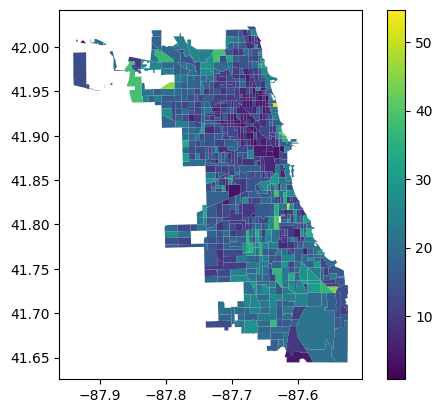

In [141]:
retiredAgeOnly = gpd.GeoDataFrame(
    retiredAgeOnly.loc[:, [c for c in retiredAgeOnly.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(retiredAgeOnly["geometry"]),
    crs="epsg:4326",
    )

plt.show()
retiredAgeOnly.plot(column='percent at retirement age', legend=True)

<Axes: >

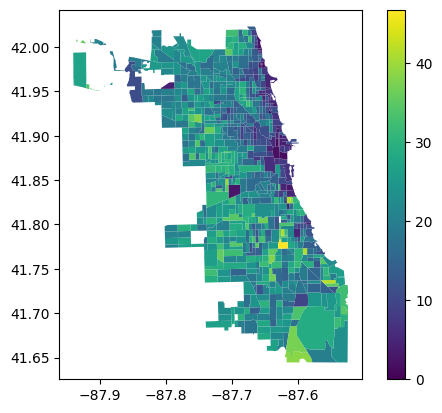

In [142]:
youthAgeOnly = ageOnly.copy(deep = True)
youthAgeOnly['percent under eighteen'] = ((youthAgeOnly['total: under 5 years']+youthAgeOnly['total: 5 to 9 years']
                                           +youthAgeOnly['total: 10 to 14 years']+youthAgeOnly['total: 15 to 17 years'])
                                             /youthAgeOnly['total population'])*100

youthAgeOnly = gpd.GeoDataFrame(
    youthAgeOnly.loc[:, [c for c in youthAgeOnly.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(youthAgeOnly["geometry"]),
    crs="epsg:4326",
    )

plt.show()
youthAgeOnly.plot(column='percent under eighteen', legend=True)